<a href="https://colab.research.google.com/github/msudhanshu10/Complete-Data-Science/blob/master/Handling_Imbalanced_Data_Set_Undersampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [6]:
dataset= pd.read_csv('/content/creditcard.csv')

In [7]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [8]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9147 entries, 0 to 9146
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    9147 non-null   int64  
 1   V1      9147 non-null   float64
 2   V2      9147 non-null   float64
 3   V3      9147 non-null   float64
 4   V4      9147 non-null   float64
 5   V5      9147 non-null   float64
 6   V6      9147 non-null   float64
 7   V7      9147 non-null   float64
 8   V8      9147 non-null   float64
 9   V9      9147 non-null   float64
 10  V10     9147 non-null   float64
 11  V11     9147 non-null   float64
 12  V12     9147 non-null   float64
 13  V13     9147 non-null   float64
 14  V14     9147 non-null   float64
 15  V15     9147 non-null   float64
 16  V16     9147 non-null   float64
 17  V17     9146 non-null   float64
 18  V18     9146 non-null   float64
 19  V19     9146 non-null   float64
 20  V20     9146 non-null   float64
 21  V21     9146 non-null   float64
 22  

In [9]:
X= dataset.drop('Class', axis=1)
y= dataset['Class']

In [10]:
X.shape

(9147, 30)

In [11]:
y.shape

(9147,)

Text(0.5, 1.0, 'Class vs Count')

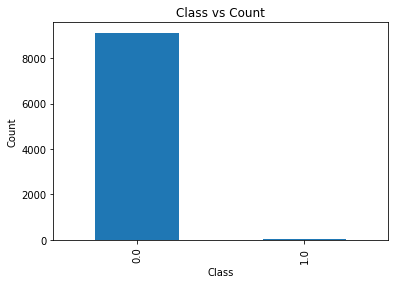

In [14]:
(pd.value_counts(dataset['Class'], sort=True)).plot.bar()
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class vs Count')

In [16]:
y.value_counts()

0.0    9112
1.0      34
Name: Class, dtype: int64

In [17]:
fraud= dataset[dataset['Class']==1]
normal= dataset[dataset['Class']==0]
print(fraud.shape, normal.shape)

(34, 31) (9112, 31)


In [18]:
from imblearn.under_sampling import NearMiss 

In [19]:
nm= NearMiss(random_state=102)

In [21]:
X.dropna(axis=0,inplace=True)
y.dropna(axis=0,inplace=True)

In [22]:
X.shape

(9146, 30)

In [23]:
X_res, y_res= nm.fit_sample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [24]:
X_res.shape

(68, 30)

In [25]:
y_res.shape

(68,)

In [31]:
pd.DataFrame(y_res)

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
63,1.0
64,1.0
65,1.0
66,1.0


In [28]:
print('Before Under sampling: ', y.value_counts())

Before Under sampling:  0.0    9112
1.0      34
Name: Class, dtype: int64


In [32]:
print(pd.DataFrame(y_res).value_counts())

1.0    34
0.0    34
dtype: int64


## CAUTION!!
Data is Lost